In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### INFO DATASET 
Model

- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- CNG = Compressed natural gas
- FFV = Flexible-fuel vehicle
- NGV = Natural gas vehicle
- "#" = High output engine that provides more power than the standard engine of the same size


Transmission

- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears


Fuel Type

- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural Gas


Fuel Consumption

- City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
- CO2 Emissions (g/km), Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating

In [5]:
train_path = "../data/mpg_train.csv"

In [6]:
train = pd.read_csv(train_path)
train

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2002,FORD,FOCUS SEDAN #,COMPACT,2.0,4,A4,X,9.1,6.8,8.1,35,186
1,2021,Porsche,Panamera Turbo S,Full-size,4.0,8,AM8,Z,15.3,11.2,13.5,21,326
2,2011,INFINITI,EX35 AWD,STATION WAGON - SMALL,3.5,6,AS7,Z,12.4,8.5,10.6,27,244
3,2005,BUICK,RENDEZVOUS AWD,SUV,3.4,6,A4,X,12.7,8.7,10.9,26,251
4,2016,ROLLS-ROYCE,GHOST EWB,FULL-SIZE,6.6,12,AS8,Z,19.2,12.4,16.1,18,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,2004,TOYOTA,TACOMA 4X4,PICKUP TRUCK - STANDARD,3.4,6,A4,X,14.6,11.3,13.1,22,301
18040,2004,BMW,Z4 ROADSTER,TWO-SEATER,2.5,6,AM6,Z,10.7,7.0,9.0,31,207
18041,2008,CADILLAC,STS,MID-SIZE,4.6,8,AS6,Z,14.1,8.1,11.4,25,262
18042,2022,Toyota,Camry AWD XSE,Mid-size,2.5,4,AS8,X,9.5,7.0,8.4,34,195


In [8]:
train.dtypes

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

In [13]:
num_feat = list(train.columns[train.dtypes != "object"])
num_feat

['YEAR',
 'ENGINE SIZE',
 'CYLINDERS',
 'FUEL CONSUMPTION',
 'HWY (L/100 km)',
 'COMB (L/100 km)',
 'COMB (mpg)',
 'EMISSIONS']

In [48]:
new_names = ["year", "brand", "model", "vehicle_class", "engine_size", "cylinders", "transmission", "fuel_type", "fuel_city_Lkm", "fuel_hwy_Lkm", "fuel_comb_Lkm", "fuel_comb_mpg", "co2"]

In [49]:
train.columns = new_names

In [50]:
train

,year,brand,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_city_Lkm,fuel_hwy_Lkm,fuel_comb_Lkm,fuel_comb_mpg,co2
0,2002,FORD,FOCUS SEDAN #,COMPACT,2.0,4,A4,X,9.1,6.8,8.1,35,186
1,2021,Porsche,Panamera Turbo S,Full-size,4.0,8,AM8,Z,15.3,11.2,13.5,21,326
2,2011,INFINITI,EX35 AWD,STATION WAGON - SMALL,3.5,6,AS7,Z,12.4,8.5,10.6,27,244
3,2005,BUICK,RENDEZVOUS AWD,SUV,3.4,6,A4,X,12.7,8.7,10.9,26,251
4,2016,ROLLS-ROYCE,GHOST EWB,FULL-SIZE,6.6,12,AS8,Z,19.2,12.4,16.1,18,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,2004,TOYOTA,TACOMA 4X4,PICKUP TRUCK - STANDARD,3.4,6,A4,X,14.6,11.3,13.1,22,301
18040,2004,BMW,Z4 ROADSTER,TWO-SEATER,2.5,6,AM6,Z,10.7,7.0,9.0,31,207
18041,2008,CADILLAC,STS,MID-SIZE,4.6,8,AS6,Z,14.1,8.1,11.4,25,262
18042,2022,Toyota,Camry AWD XSE,Mid-size,2.5,4,AS8,X,9.5,7.0,8.4,34,195


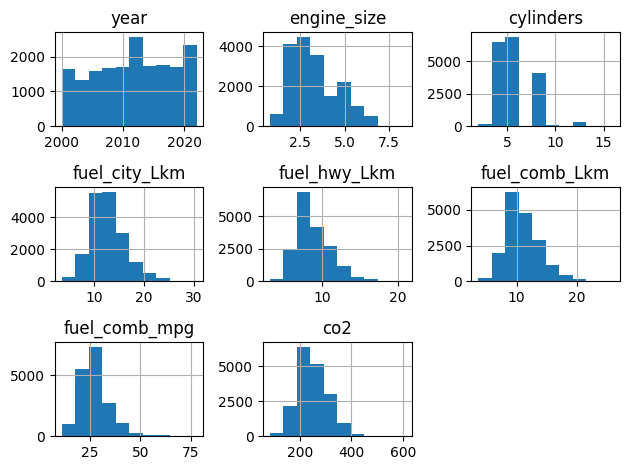

In [47]:
train[new_names].hist()
plt.tight_layout()

In [15]:
target = "COMB (mpg)"